In [21]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [28]:
df = pd.read_csv(r'C:\Users\soura\Downloads\Mall_Customers.csv')

In [32]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [36]:
df.shape

(200, 5)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [42]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [44]:
df.size

1000

In [46]:
rows, columns = df.shape

In [48]:
ratio = rows/columns
print(ratio)

40.0


In [50]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [52]:
df.duplicated().sum()

0

In [54]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

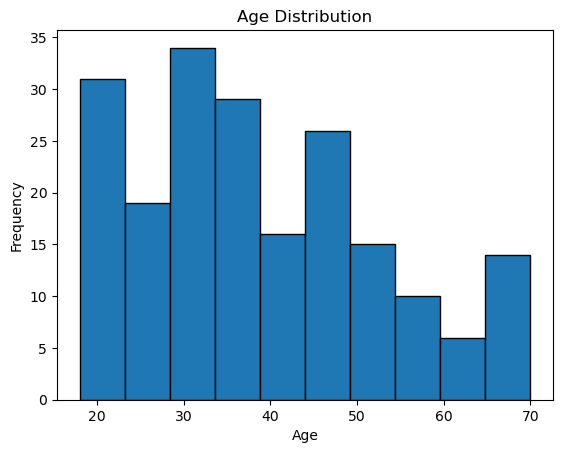

In [56]:
plt.hist(df['Age'], bins = 10, edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [58]:
gender_counts = df['Gender'].value_counts()

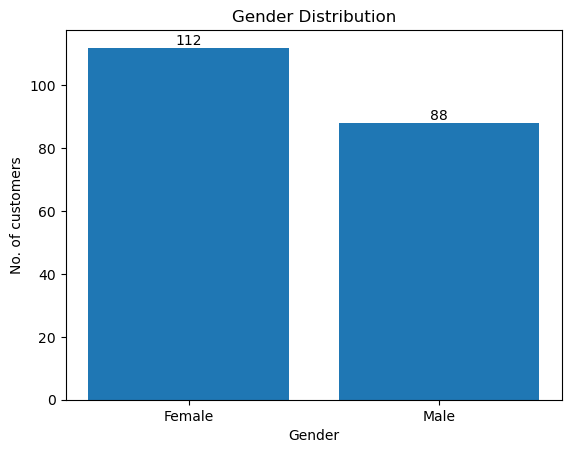

In [60]:
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('No. of customers')

# Add value labels on top of bars
for i, value in enumerate(gender_counts.values):
    plt.text(i, value + 1, str(value), ha='center')

plt.show()

In [62]:
df.rename(columns={
    'Spending Score (1-100)' : 'Spending Score',
    'Annual Income (k$)' : 'Annual Income'
}, inplace=True)

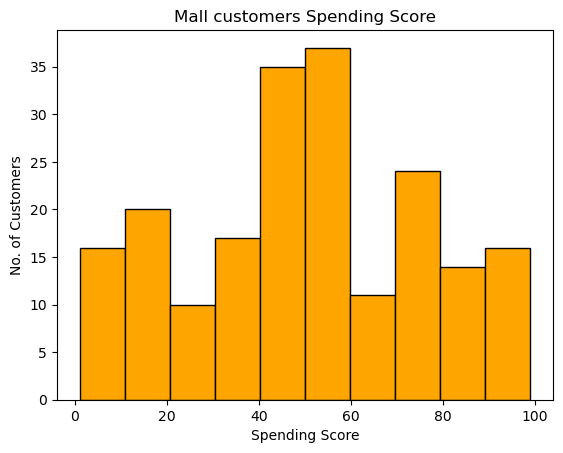

In [64]:
plt.hist(df['Spending Score'],bins = 10,edgecolor='black',color='orange')
plt.title('Mall customers Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('No. of Customers')
plt.show()

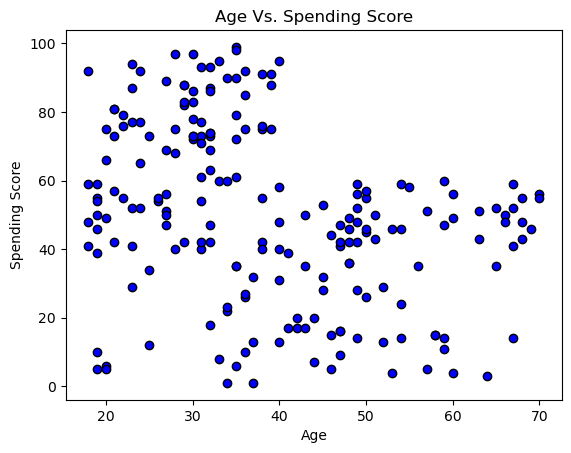

In [66]:
plt.scatter('Age','Spending Score', data = df,color = 'blue', edgecolor='black')
plt.title('Age Vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

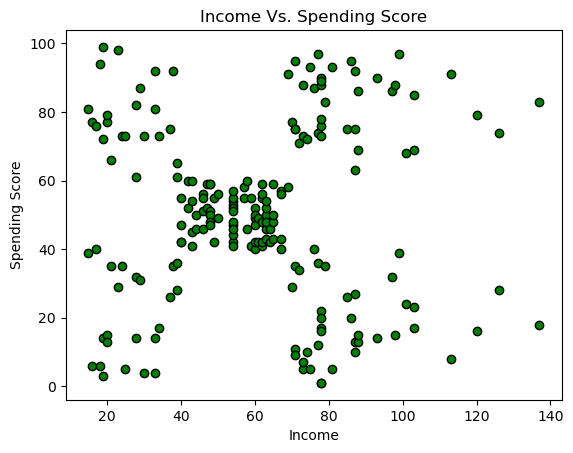

In [68]:
plt.scatter('Annual Income','Spending Score', data = df,color = 'green',edgecolor='black')
plt.title('Income Vs. Spending Score')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

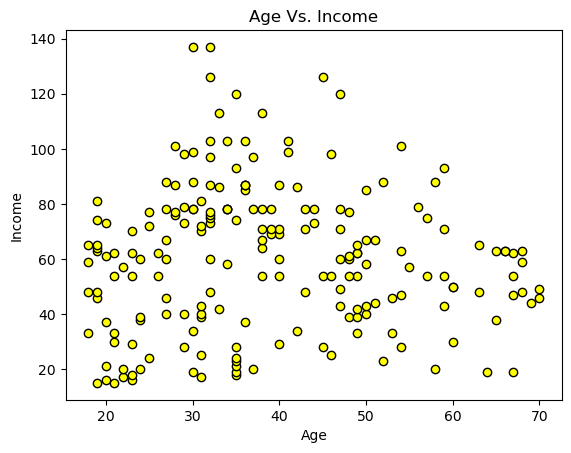

In [70]:
plt.scatter('Age','Annual Income', data = df,color = 'yellow',edgecolor='black')
plt.title('Age Vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [72]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [74]:
df.head()

,CustomerID,Age,Annual Income,Spending Score,Gender_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


In [76]:
df['Gender_Male'] = df['Gender_Male'].astype(int)

In [78]:
corr_matrix = df.corr()
print(corr_matrix)

                CustomerID       Age  Annual Income  Spending Score  \
CustomerID        1.000000 -0.026763       0.977548        0.013835   
Age              -0.026763  1.000000      -0.012398       -0.327227   
Annual Income     0.977548 -0.012398       1.000000        0.009903   
Spending Score    0.013835 -0.327227       0.009903        1.000000   
Gender_Male       0.057400  0.060867       0.056410       -0.058109   

                Gender_Male  
CustomerID         0.057400  
Age                0.060867  
Annual Income      0.056410  
Spending Score    -0.058109  
Gender_Male        1.000000  


In [80]:
df = df.drop('CustomerID', axis = 1)

In [82]:
df.columns

Index(['Age', 'Annual Income', 'Spending Score', 'Gender_Male'], dtype='object')

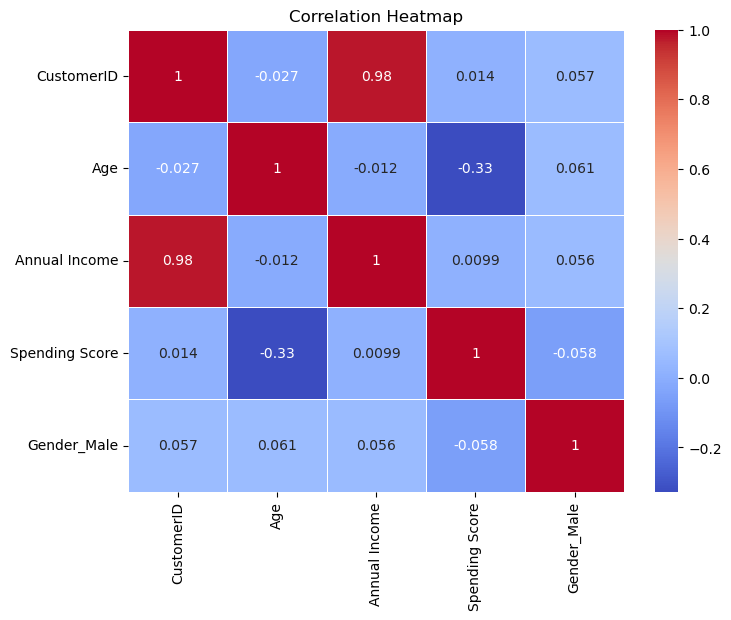

In [84]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.show()

In [86]:
# Define your features (X) and target (y)
X = df.drop('Spending Score', axis = 1)
y = df['Spending Score']

# Split data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
X = df[['Spending Score','Annual Income', 'Age','Gender_Male']]

In [107]:
X_scaled = scaler.fit_transform(X)

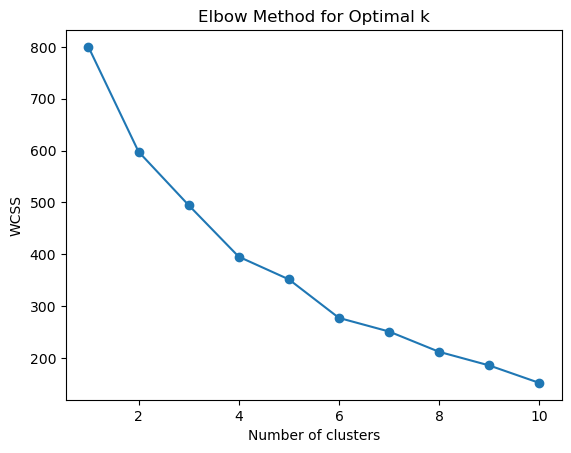

In [109]:
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

#plotting elbow curve (to tune hyperparmeter k - no. of clusters)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [185]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [187]:
df['Cluster'] = y_kmeans

In [193]:
df.head()

,Age,Annual Income,Spending Score,Gender_Male,Cluster
0,19,15,39,1,2
1,21,15,81,1,2
2,20,16,6,0,4
3,23,16,77,0,4
4,31,17,40,0,4


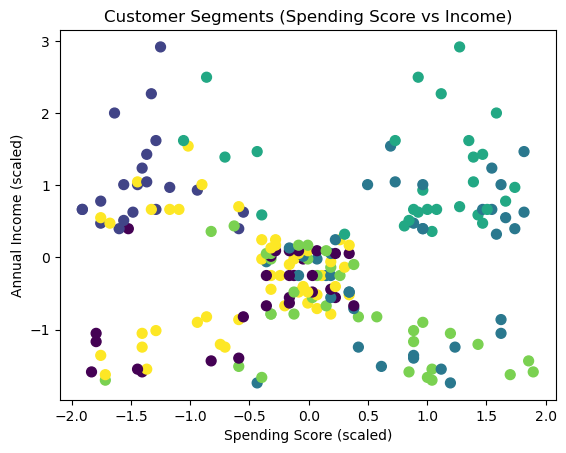

In [195]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title('Customer Segments (Spending Score vs Income)')
plt.xlabel('Spending Score (scaled)')
plt.ylabel('Annual Income (scaled)')
plt.show()

In [197]:
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Inertia (WCSS):", kmeans.inertia_)
print("Number of iterations:", kmeans.n_iter_)
print("Silhouette Score:", silhouette_score(X_scaled, kmeans.labels_))
print("Cluster Sizes:\n", df['Cluster'].value_counts())


Cluster Centers:
 [[-0.44589335 -0.52575662  1.31794399  1.12815215]
 [-1.38870269  1.06009228  0.010765    0.93628954]
 [ 0.79653879 -0.08890541 -0.74922584  1.12815215]
 [ 0.85166472  1.16319361 -0.40498685 -0.74747027]
 [ 0.30065142 -0.73599142 -0.93017604 -0.88640526]
 [-0.5306164  -0.24064607  0.79409079 -0.88640526]]
Inertia (WCSS): 277.3897401985192
Number of iterations: 8
Silhouette Score: 0.33475434756692174
Cluster Sizes:
 Cluster
5    47
2    39
4    36
3    29
0    28
1    21
Name: count, dtype: int64


In [201]:
df.groupby('Cluster').mean()

,Age,Annual Income,Spending Score,Gender_Male
Cluster,,,,
0,57.214286,46.785714,38.714286,1.000000
1,39.000000,88.333333,14.428571,0.904762
2,28.410256,58.230769,70.717949,1.000000
3,33.206897,91.034483,72.137931,0.068966
4,25.888889,41.277778,57.944444,0.000000
5,49.914894,54.255319,36.531915,0.000000


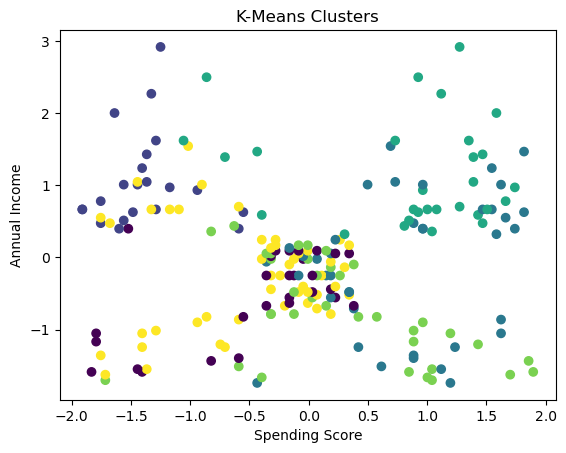

In [203]:
plt.scatter(X_scaled[:, 0],X_scaled[:,1],c=df['Cluster'],cmap='viridis')
plt.title('K-Means Clusters')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.show()

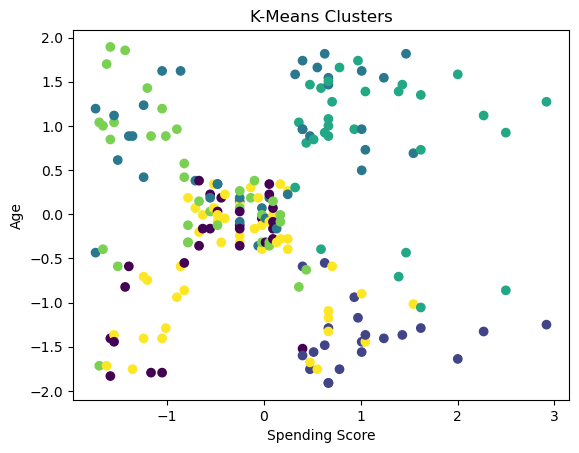

In [205]:
plt.scatter(X_scaled[:, 1],X_scaled[:,0],c=df['Cluster'],cmap='viridis')
plt.title('K-Means Clusters')
plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.show()

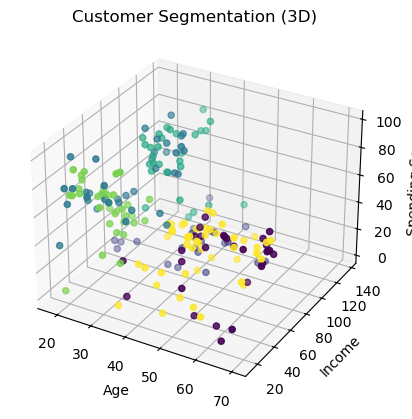

In [209]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income'], df['Spending Score'],
           c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending Score')
plt.title('Customer Segmentation (3D)')
plt.show()


In [127]:
df.groupby('Cluster').agg({'Age' : ['min', 'max'],
                           'Annual Income' : ['min', 'max'],
                           'Spending Score' : ['min', 'max']
                          })

Age     Annual Income      Spending Score    
        min max           min  max            min max
Cluster                                              
0        35  70            19   71              3  60
1        19  59            71  137              1  36
2        18  40            15  101             39  97
3        27  45            69  137             23  95
4        18  35            16   72              6  99
5        34  68            18  101              5  59

In [145]:
#Hypothesis test to check if the spending score differs significantly with gender
from scipy.stats import ttest_ind

male_scores = df[df['Gender_Male'] == 1]['Spending Score']
female_scores = df[df['Gender_Male'] == 0]['Spending Score']

t_stat,p_value = ttest_ind(male_scores, female_scores, equal_var = False)
print(f"t-statistic: {t_stat:.3f}, p-value {p_value:.3f}")

t-statistic: -0.805, p-value 0.422


In [131]:
print(df.columns.tolist())

['Age', 'Annual Income', 'Spending Score', 'Gender_Male', 'Cluster']


In [215]:
df.head()

,Age,Annual Income,Spending Score,Gender_Male,Cluster
0,19,15,39,1,2
1,21,15,81,1,2
2,20,16,6,0,4
3,23,16,77,0,4
4,31,17,40,0,4


In [217]:
print(os.getcwd())

C:\Users\soura\OneDrive - The University of Texas at Dallas\Documents\Academia
